In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#importing the dataset
data = pd.read_csv('soybean.csv')
display(data.head())

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
#Verify if there are missing values or mispellings in the dataset

for name in data:
    unique_credito = data[name].unique()
    print(unique_credito)


['october' 'august' 'july' 'september' 'may' 'april' 'june' '?']
['normal' 'lt-normal' '?']
['gt-norm' 'lt-norm' 'norm' '?']
['norm' 'gt-norm' 'lt-norm' '?']
['yes' 'no' '?']
['same-lst-yr' 'same-lst-two-yrs' 'same-lst-sev-yrs' 'diff-lst-year' '?']
['low-areas' 'scattered' 'whole-field' 'upper-areas' '?']
['pot-severe' 'severe' '?' 'minor']
['none' 'fungicide' '?' 'other']
['90-100' '80-89' 'lt-80' '?']
['abnorm' 'norm' '?']
['abnorm' 'norm']
['absent' '?' 'no-yellow-halos' 'yellow-halos']
['dna' '?' 'w-s-marg' 'no-w-s-marg']
['dna' '?' 'gt-1/8' 'lt-1/8']
['absent' '?' 'present']
['absent' '?' 'present']
['absent' '?' 'upper-surf' 'lower-surf']
['abnorm' 'norm' '?']
['no' 'yes' '?']
['above-sec-nde' 'absent' 'below-soil' 'above-soil' '?']
['brown' 'dna' 'tan' 'dk-brown-blk' '?']
['present' 'absent' '?']
['firm-and-dry' 'absent' '?' 'watery']
['absent' 'present' '?']
['none' 'black' 'brown' '?']
['absent' 'present' '?']
['norm' 'dna' '?' 'diseased' 'few-present']
['dna' '?' 'absent' 'co

In [4]:
# Separate the class (y) from the predictor variables (x)
predictor = data.iloc[:,0:35].values
class_ = data.iloc[:,35].values

In [5]:
# Transformation of categorical attributes into numerical attributes, passing the index of each categorical column
label = LabelEncoder()

for i in range(0,35):
    predictor[:,i] = label.fit_transform(predictor[:,i])

display(predictor)

array([[6, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 2],
       [3, 2, 1, ..., 2, 1, 2],
       ...,
       [4, 1, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [4, 1, 0, ..., 0, 0, 3]], dtype=object)

In [22]:
#Division of dataset into train and test (70% for training and 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(predictor, class_, test_size = 0.4, random_state = 0)

In [23]:
#Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [24]:
#Predict the response for test dataset
prediction = naive_bayes.predict(x_test)

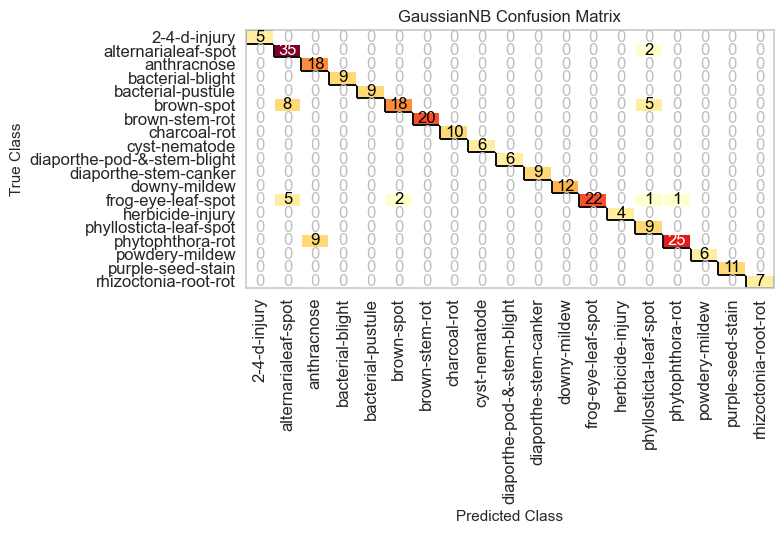

<AxesSubplot: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
#Display the confusion matrix
conf_image = ConfusionMatrix(GaussianNB())
conf_image.fit(x_train, y_train)
conf_image.score(x_test, y_test)
conf_image.poof()

In [26]:
#Calculate the accuracy of the model
ACC = accuracy_score(y_test, prediction)
print(f"Accuracy: {ACC*100:.1f} %")

Accuracy: 88.0 %


In [27]:
# Use of the ExtraTreesClassifier algorithm to extract the most important characteristics
forest = ExtraTreesClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
print(importances)

[0.04983282 0.02118479 0.02804311 0.02975709 0.02320159 0.02016625
 0.02717274 0.02715824 0.01959158 0.01632076 0.02871369 0.01925296
 0.04029649 0.05444695 0.04672404 0.03087512 0.01555902 0.02930936
 0.03346723 0.00865182 0.033247   0.04752573 0.03161939 0.03263183
 0.0080952  0.03577992 0.01842756 0.05401855 0.03943312 0.03855179
 0.02619126 0.01494744 0.01822879 0.01090092 0.02067586]


In [105]:
# Sorting the list
big = list(set(importances))
big.sort()

#Define the number of features to be used in model construction
n = 20

# Finding the biggest importances
best_importances = []
for i in range(1,n+1):
    print(big[-i])
    big_index = np.where(importances == big[-i])
    best_importances.append(big_index[0][0])

print(best_importances)
print(data.columns[best_importances])
    


0.05444695263609862
0.05401855029692546
0.04983282488369533
0.047525725062747416
0.04672403703355977
0.040296492511291075
0.03943311686888194
0.038551786312291475
0.03577991555905656
0.033467227458437936
0.03324699583608048
0.03263182811758279
0.03161938898331516
0.030875119682360546
0.02975708870051245
0.02930936043595648
0.028713692653231017
0.028043106315799964
0.027172744616158356
0.027158237872947168
[13, 27, 0, 21, 14, 12, 28, 29, 25, 18, 20, 23, 22, 15, 3, 17, 10, 2, 6, 7]
Index(['leafspots-marg', 'fruit-pods', 'date', 'canker-lesion',
       'leafspot-size', 'leafspots-halo', 'fruit-spots', 'seed',
       'int-discolor', 'stem', 'stem-cankers', 'external-decay',
       'fruiting-bodies', 'leaf-shread', 'temp', 'leaf-mild', 'plant-growth',
       'precip', 'area-damaged', 'severity'],
      dtype='object')


In [106]:
# Creation of a new database using only the most important attributes
x_train2 = x_train[:,best_importances]
x_test2 = x_test[:,best_importances]


In [107]:
# Create another model with reduced database, training and obtaining predictions
naive_bayes2 = GaussianNB()
naive_bayes2.fit(x_train2, y_train)
prediction2 = naive_bayes2.predict(x_test2)


In [108]:
#Calculate the accuracy of the new model
ACC2 = accuracy_score(y_test, prediction2)
print(f"Accuracy: {ACC2*100:.1f} %")


Accuracy: 86.5 %


In [109]:
#summary of the results
if ACC2 > ACC:
    print(f'The attribute selection improved the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )
else:
    print(f'The attribute selection did not improve the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )

The attribute selection did not improve the accuracy of the model : 88.0 --> 86.5 %
